### Missing Value

In [ ]:
import seaborn as sns 

In [ ]:
df = sns.load_dataset('titanic')
df.head()


In [ ]:
# Detect missing Value...
print(df.isnull().sum())
df.isnull() # show true where value is missing

### Methods to handle missing value

**Deletion Method**

In [ ]:
# Row-Wise Deletion
row_drop = df.dropna(axis=0)
df.shape 

# Column-WIse Deletion
column_drop = df.dropna(axis=1)
column_drop.shape

column_drop.head()
row_drop.head()


**Imputation Methods**

In [ ]:
# Mean Imputation : Used when data are normally distributed...

df['age'] = df['age'].fillna(df['age'].mean())
df['age'].isnull().sum()

In [ ]:
# Median Imputation : Used When data contains outliers....

df['age'] = df['age'].fillna(df['age'].median())
df['age'].isnull().sum()

In [ ]:
# Mode Imputation : Used when we have categorical data....

df_mode = df[df['deck'].notna()]['deck'].mode()[0]
df['deck'] = df['deck'].fillna(df_mode) 
 
df['deck'].isnull().sum()

### Handling imbalanced Dataset 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample


In [ ]:
# Import dataset
df = pd.read_csv('imbalenced_dataset.csv')
df.head()

# Check before apply method...
df['Insurance'].value_counts()


**1. Up-Sampling**

In [ ]:
# 1.Sepreate dataset
df_majority = df[df['Insurance'] == 0]
df_minority = df[df['Insurance'] == 1]

# 2.Upsampled Minority Class
df_minority_upsampled = resample(
    df_minority,
     replace=True,
    n_samples = len(df_majority),
    random_state = 42

)

# 3. Combine dataset..
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled['Insurance'].value_counts()

**2. Down-Sampled**

In [ ]:
# seperate dataset.. 
df_majority = df[df['Insurance'] == 0]
df_minority = df[df['Insurance'] == 1]

# 2. Downsample Majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42

)

# Combine dataset..
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

# check result
df_downsampled['Insurance'].value_counts() 


**3. SMOT**

In [ ]:
# Import packages...

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 

In [ ]:
# Import dataset..
df = pd.read_csv('imbalenced_dataset.csv')
df.head()

# seprate
x = df[['Age','Income','Credit_Score']]
y = df[['Insurance']]

# Check before apply smote
df['Insurance'].value_counts()


In [ ]:
# Visulize before SMOTE
plt.scatter(df['Age'],df.Insurance,c=df['Insurance'])
plt.show()

In [ ]:
# Apply SMOTE
smote  = SMOTE(random_state=42)
x_resampled,y_resampled = smote.fit_resample(x,y)

In [ ]:
# new balanced dataset
df_new = pd.DataFrame(x_resampled,columns=['Age','Income','Credit_Score'])
df_new['Insurance'] = y_resampled

df_new.to_csv('balanced_data.csv',index=False)
df_new['Insurance'].value_counts()


In [ ]:
# Visualixe after SMOTE
plt.scatter(df_new['Age'],df_new['Insurance'],c=df_new['Insurance'])
plt.show()

### Five number Summary and box plot

##### Five number summary

In [1]:
# import packages
import numpy as np


In [26]:
# dataset 

marks = [45,67,89,54,44,47,89,2,150,45,32,67,88,66,43,79,59,85,-58]
marks 

# 5 Number summary...
minimum, Q1, median, Q3, maximum = np.quantile(marks,[0,0.25,0.50,0.75,1])
minimum,Q1,median,Q3,maximum

(np.float64(-58.0),
 np.float64(44.5),
 np.float64(59.0),
 np.float64(82.0),
 np.float64(150.0))

In [ ]:
# Find outliers...

# 1. find IQR (inter quartile range):- 

IQR = Q3-Q1
IQR

# 2. Lower fance and higher fance...
lower_fance = Q1-1.5*IQR
higher_fance = Q3+1.5*IQR


lower_fance,higher_fance

# check outlier in dataset....
for m in marks:
    if m < lower_fance or m > higher_fance:
        print('Outlier found',m) 

Outlier found 150
Outlier found -58


#### Box plot to see 5 number summary and outliers

In [31]:
import seaborn as sns

<Axes: >

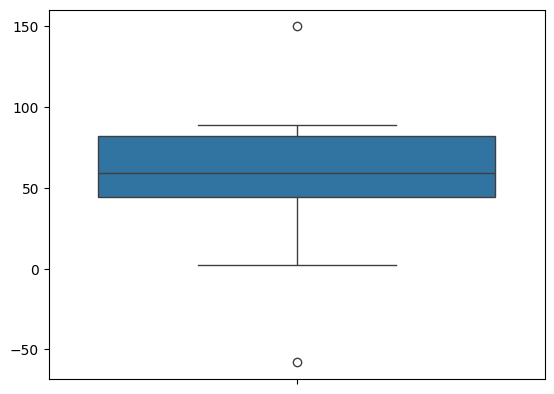

In [34]:
sns.boxplot(marks) 



**Note :** 
- 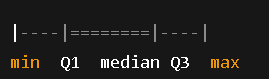..
- if data see in circle/points form called outliers..

### Data Encoding

1. Nominal/OHE Encoding
2. Label and Ordinal Encoding
3. Target Guided Ordinal Encoding 

#### Nominal/one hot Encoding

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder 

In [24]:
# Sample Data 

data = {
    'color':['red','green','red','blue','green','green']
}
df = pd.DataFrame(data)
df

,color
0,red
1,green
2,red
3,blue
4,green
5,green


In [25]:
# Create instance..
encoder = OneHotEncoder()

encoded = encoder.fit_transform(df[['color']]).toarray()
encoded

# Convert into dataframe..
encoder_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

# Combine dataframe...
pd.concat([df,encoder_df],axis=1)


,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,red,0.0,0.0,1.0
3,blue,1.0,0.0,0.0
4,green,0.0,1.0,0.0
5,green,0.0,1.0,0.0


In [22]:
# test on sepreat
encoder.transform([['blue']]).toarray()

c:\Users\shali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 1., 0., 0.]])

#### Label Encoding

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [27]:
# Sample Data...
data = {
    'color':['Red','green','blue','Red','blue','blue','green']
}

df = pd.DataFrame(data)
df

,color
0,Red
1,green
2,blue
3,Red
4,blue
5,blue
6,green


In [30]:
# Create instance..
lbl_encoder = LabelEncoder()

# fit and transform..
df['color_encoder'] = lbl_encoder.fit_transform(df['color'])
df

,color,color_encoder
0,Red,0
1,green,2
2,blue,1
3,Red,0
4,blue,1
5,blue,1
6,green,2


In [36]:
# Test on seperate

lbl_encoder.transform([['green']])

c:\Users\shali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:139: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

#### Ordinal Encoding

In [41]:
import pandas as pd 
from sklearn.preprocessing import OrdinalEncoder

In [43]:
# Create Sample dataset..
data = {
    'size':['small','medium','small','small','medium','medium','medium','large','large']
}

df = pd.DataFrame(data)
df

,size
0,small
1,medium
2,small
3,small
4,medium
5,medium
6,medium
7,large
8,large


In [48]:
# Create instance with categories
ordinal_encoder = OrdinalEncoder(categories=[['small','medium','large']])

# Fit and transfrom data..
df['size_encoded'] = ordinal_encoder.fit_transform(df[['size']])
df

,size,size_encoded
0,small,0.0
1,medium,1.0
2,small,0.0
3,small,0.0
4,medium,1.0
5,medium,1.0
6,medium,1.0
7,large,2.0
8,large,2.0


#### Target guide ordinal encoding

In [49]:
import pandas as pd

In [51]:
# Sample Data..
data = {
    'city':['New york','delhi','delhi','paries','london','mumbai','london','delhi','new york','london'],
    'price':[200,400,300,230,120,560,780,340,450,670]
}

df = pd.DataFrame(data)
df


,city,price
0,New york,200
1,delhi,400
2,delhi,300
3,paries,230
4,london,120
5,mumbai,560
6,london,780
7,delhi,340
8,new york,450
9,london,670


In [ ]:
# Calculate mean target per columns..
mean_encoding = df.groupby('city')['price'].mean()
mean_encoding

city
New york    200.000000
delhi       346.666667
london      523.333333
mumbai      560.000000
new york    450.000000
paries      230.000000
Name: price, dtype: float64

In [58]:
# map encoded value
df['city_enccoded'] = df['city'].map(mean_encoding)

df,df[['city_enccoded','price']]

(       city  price  city_enccoded
 0  New york    200     200.000000
 1     delhi    400     346.666667
 2     delhi    300     346.666667
 3    paries    230     230.000000
 4    london    120     523.333333
 5    mumbai    560     560.000000
 6    london    780     523.333333
 7     delhi    340     346.666667
 8  new york    450     450.000000
 9    london    670     523.333333,
    city_enccoded  price
 0     200.000000    200
 1     346.666667    400
 2     346.666667    300
 3     230.000000    230
 4     523.333333    120
 5     560.000000    560
 6     523.333333    780
 7     346.666667    340
 8     450.000000    450
 9     523.333333    670)